# Algorytmy macierzowe - mnożenie macierzy
## Wykonali: Robert Kazimirek, Paweł Kruczkiewicz


**Numer ćwiczenia: 3**

*Temat:* Proszę napisać mnożenie macierzy rIGA i rIGA używając algorytmu mnożenia blokowego, i 
dobrać optymalną kolejność pętli oraz rozmiar bloków 

Treść ćwiczenia:

1. Proszę wybrać dwie możliwie największe macierze A i B ze swoich dwóch 
rodzin macierzy, takie żeby zgadzały się ich rozmiary, oraz przemnożyć je 
A*B swoim optymalnym algorytmem (tak duże macierze jakie da się w 
czasie kilku-kilkudziesięciu minut przemnożyć na Państwa laptopie) 
2. Proszę narysować schemat niezerowych wartości swoich dwóch macierzy 
(używając komendy spy(A), spy(B) MATLABa) oraz macierzy wynikowej 
A*B 
3. Proszę zmierzyć czas mnożenia tych wybranych dwóch dużych macierzy dla 
różnej kolejności pętli w algorytmie mnożenia macierzy. Proszę narysować 
tabelkę: kolejność pętli (6 możliwości) versus czasy mnożenia 
3. Proszę wybrać jedną kolejność pętli i następnie dla swoich dwóch macierzy 
A i B zmierzyć czasy mnożenia w algorytmie mnożenia blokowego.  Proszę 
narysować wykres: oś x rozmiar bloków, oś y czas mnożenia 
4. Proszę obliczyć liczbę operacji zmienno-przecinkowych koniecznych do 



In [42]:
import numpy as np
import matplotlib.pyplot as plt

### Ad. 1
Jako macierze A i B wybraliśmy macierze wygenerowane przez podany na zajęciach skrypt `massmatrix.m`. W tym celu użyliśmy funkcji `massmatrix(2,6,2,2)`, która ma rozmiar 100x100. Następnie wyniki zapisaliśmy w pliku o formacie csv. Poniższy kod wczytuje obie macierze jako `np.array` 

Następnie powiększyliśmy wejściową macierz poprzez powtórzenie. Otrzymaliśmy macierz 400x400.  

In [43]:
def get_matrix_from_csv(csv_file):
    return np.loadtxt(open(csv_file, "rb"), delimiter=",", skiprows=0)

In [44]:
def scale_matrix(a, n):
    a_size = len(a)
    new_matrix = np.zeros([a_size * n, a_size * n])

    for x_index in range(n * a_size):
        for y_index in range(n * a_size):
            new_matrix[x_index, y_index] = a.item(x_index % a_size, y_index % a_size)

    return new_matrix

In [45]:
A = scale_matrix(get_matrix_from_csv("rigas/riga100.csv"), 4)
B = scale_matrix(get_matrix_from_csv("rigas/riga100.csv"), 4)

### Ad. 2
Poniżej przedstawiamy niezerowe pola wejściowych oraz wyjściowe macierzy. Fiolet oznacza niezerową wartość, żółty oznacza zerową. Do mnożenia macierzy wykorzystano wbudowany w bibliotekę numpy znak mnożenia macierzy

In [46]:
def spy(matrix, label, plot):
    mask = matrix == 0
    plot.matshow(mask)

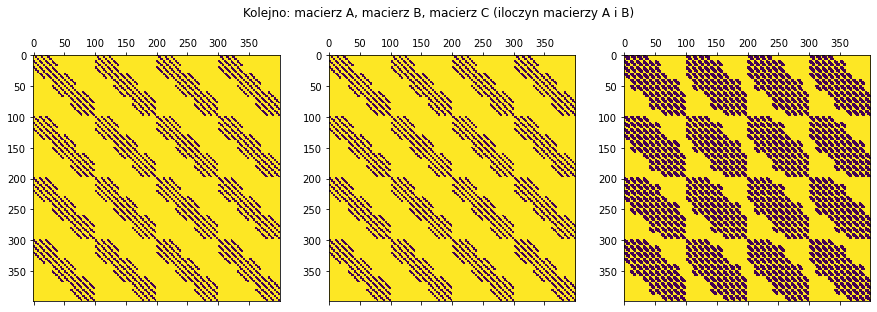

In [47]:
n = np.size(A, 0)
C = A@B
    
fig, (plot_1, plot_2, plot_3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Kolejno: macierz A, macierz B, macierz C (iloczyn macierzy A i B)')

spy(A, f"A, size={n}", plot_1)
spy(B, f"B, size={n}", plot_2)
spy(C, f"C, size={n}", plot_3)

### Ad. 3
Teraz zmierzymy czas dla wszystkich możliwych 6 permutacji obliczania iloczynu macierzy. Urzyjemy do tego funkcji `log_time`, która wypisze nam czas trwania funkcji w sekundach. Wyniki, dla zwiększenia dokładności, są średnią arytmetyczną z pięciu testów.

In [48]:
from time import time

def log_time(func, message):
    number_of_tests = 5
    exec_times = []
    for _ in range(number_of_tests):
        t1 = time()
        func()
        t2 = time()
        exec_times.append(round(t2 - t1, 5))
    
    avg_time = round(sum(exec_times)/number_of_tests, 5)
    print(f"{message:8}: {avg_time} [s]")
    return avg_time

In [49]:
def multi_ijp(A, B, C):
    m, n, k = np.size(C, 0), np.size(C, 1), np.size(A, 1)
    for i in range(m):
        for j in range(n):
            for p in range(k):
                C[i][j] += A[i][p] * B[p][j]
                
                
def multi_ipj(A, B, C):
    m, n, k = np.size(C, 0), np.size(C, 1), np.size(A, 1)
    for i in range(m):
        for p in range(k):
            for j in range(n):
                C[i][j] += A[i][p] * B[p][j]


def multi_jip(A, B, C):
    m, n, k = np.size(C, 0), np.size(C, 1), np.size(A, 1)
    for j in range(n):
        for i in range(m):
            for p in range(k):
                C[i][j] += A[i][p] * B[p][j]


def multi_jpi(A, B, C):
    m, n, k = np.size(C, 0), np.size(C, 1), np.size(A, 1)
    for j in range(n):
        for p in range(k):
            for i in range(m):
                C[i][j] += A[i][p] * B[p][j]


def multi_pij(A, B, C):
    m, n, k = np.size(C, 0), np.size(C, 1), np.size(A, 1)
    for p in range(k):
        for i in range(m):
            for j in range(n):
                C[i][j] += A[i][p] * B[p][j]


def multi_pji(A, B, C):
    m, n, k = np.size(C, 0), np.size(C, 1), np.size(A, 1)
    for p in range(k):
        for j in range(n):
            for i in range(m):
                C[i][j] += A[i][p] * B[p][j]



def mat_mul(A, B, mul_func=multi_ijp):
    C = np.zeros((np.size(A, 0), np.size(B, 1)))
    mul_func(A, B, C)
    return C

In [50]:
mat_mul_functions = [multi_ijp ,multi_ipj, multi_jip, multi_jpi, multi_pij, multi_pji]

print("Function  time")

times = [log_time(lambda: mat_mul(A, B, fun), fun.__name__) 
         for fun in mat_mul_functions]
mult_names = [fun.__name__ for fun in mat_mul_functions]

Function  time
multi_ijp: 44.59196 [s]
multi_ipj: 44.84672 [s]
multi_jip: 45.72024 [s]
multi_jpi: 45.70806 [s]
multi_pij: 45.91887 [s]
multi_pji: 44.6179 [s]


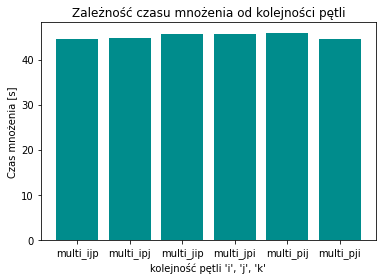

In [51]:
plt.bar(mult_names, times, color='#008c8c')

plt.xlabel("kolejność pętli 'i', 'j', 'k'")
plt.ylabel("Czas mnożenia [s]")
plt.title("Zależność czasu mnożenia od kolejności pętli")

plt.show()

Wybór kolejności występowanie pętli "i", "j", "k" nie wpłynął w sposób znaczący na prędkość operacji. Najprawdopodbniej wynika to z wysokopoziomowości języka Python, w którym zostało zaimplementowane mnożenie.

### Ad. 4
Poniżej napisaliśmy program do blokowego mnożenia macierzy. Ponieważ w tym ćwiczeniu mamy do czynienia jedynie z macierzami kwadratowymi, przyjęliśmy, że podziały bloków przy różnych kolumnach macierzy są zawsze takie same. Zależność czasu od długości pojedynczego bloku przedstawiliśmy na wykresie poniżej.

In [52]:
def block_mul(A, B, m_bs, n_bs, k_bs):
    C = np.zeros((np.size(A, 0), np.size(B, 1)))
    m, n, k = np.size(C, 0), np.size(C, 1), np.size(A, 1)

    for i in range(0, m, m_bs):
        for j in range(0, n, n_bs):
            for p in range(0, k, k_bs):
                A_slice = A[i:i+m_bs, p:p+k_bs]
                B_slice = B[p:p+k_bs, j:j+n_bs]
                C_slice = C[i:i+m_bs, j:j+n_bs]
                multi_ijp(A_slice, B_slice, C_slice)
    return C

In [54]:
block_lengths = [2, 5, 10, 15, 20, 25, 40, 50, 100, 200]
times = [
    log_time(lambda: block_mul(A, B, nb, nb, nb), f"Block length {nb}") 
    for nb in block_lengths
]



Block length 2: 88.48018 [s]
Block length 5: 53.80288 [s]
Block length 10: 49.45752 [s]
Block length 15: 45.75403 [s]
Block length 20: 45.66175 [s]
Block length 25: 45.3083 [s]
Block length 40: 47.63573 [s]
Block length 50: 45.241 [s]
Block length 100: 44.12835 [s]
Block length 200: 44.75892 [s]


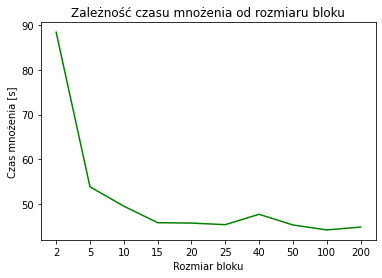

In [55]:
x_pos = [i for i, _ in enumerate(block_lengths)]

plt.plot(x_pos, times, color='green')

plt.xlabel("Rozmiar bloku")
plt.ylabel("Czas mnożenia [s]")
plt.title("Zależność czasu mnożenia od rozmiaru bloku")
plt.xticks(x_pos, block_lengths)

plt.show()

Małe rozmiary bloków, spowodowały wydłużenie czasu mnożenia macierzy. Przypuszczamy, że ze względu na wysokopoziomowość języka Python, stosowanie mnożenia blokowego, nie wpłynęło na przyspieszenie wykonania operacji, natomiast dodatkowe obliczenia, związane z częstszym dzieleniem macierzy, spowodowały wydłużenie czasu wykonania.

### Ad. 5
Wzór na liczbę operacji zmiennopzecinkowych to `2*m*n*p`. Dla macierzy kwadratowych używanych w powyższym sprawozdaniu  `m = n = p = 400`.

Zatem liczba operacji zmiennoprzecinkowych dla naszych macierzy wynosi: `2*400*400*400 = 128000000`

## Podsumowanie

Niestety powyższe implementacje mnożenia macierzy nie pokazały, aby zmiana kolejności pętli w procedurze mnożenia czy mnożenie blokowe w sposób znaczny wpłynęły na szybkość wykonania algorytmu. Powstałe wyżej różnice w czasie wykonania mogą być uzależnione od czynników zewnętrznych.

Aby prawidłowo zbadać skuteczność w.w. technik, należałoby napisać opisywane procedury w językach niższego poziomu, co pozwoliłoby na wykorzystanie pamięci `cache` procesora.